# ID das variáveis
### 0 = Dados de importação - COMEXSTAT
### 1 = Dados de exportação - COMEXSTAT


In [97]:
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
data_0 = pd.read_csv('/content/imp_por_vias_comexstat.csv', sep=';')
data_1 = pd.read_csv('/content/exp_por_vias_comexstat.csv', sep=';')

In [90]:
#data = pd.concat([data_0, data_1])
#data
data_0

,Ano,Via,Quilograma Líquido
0,2023,MARITIMA,158010309810
1,2023,RODOVIARIA,6620809011
2,2023,CONDUTO/REDE DE TRANSMISSAO,4423244968
3,2023,AEREA,228005442
4,2023,FERROVIARIA,35313000
5,2023,MEIOS PROPRIOS,20796129
6,2023,ENTRADA/SAIDA FICTA,14232563
7,2023,COURIER,1269
8,2023,POSTAL,798


In [91]:
data_1

,Ano,Via,Quilograma Líquido
0,2023,MARITIMA,784009868194
1,2023,RODOVIARIA,7712988003
2,2023,FLUVIAL,6533626712
3,2023,AEREA,2161249650
4,2023,VIA NAO DECLARADA,1246608778
5,2023,FERROVIARIA,155892479
6,2023,VICINAL FRONTEIRICO,146524913
7,2023,MEIOS PROPRIOS,9215509
8,2023,EM MAOS,158379
9,2023,CONDUTO/REDE DE TRANSMISSAO,56104


In [92]:
# Adicionando uma coluna indicando ser importação ou exportação
imp = []
for i in range(len(data_0)):
  imp.append('IMP')
data_0['Tipo'] = imp

exp = []
for i in range(len(data_1)):
  exp.append('EXP')
data_1['Tipo'] = exp

In [93]:
# muda a posição da coluna 'Tipo'
data_0 = data_0.loc[:, ['Ano', 'Via', 'Tipo', 'Quilograma Líquido']]
data_1 = data_1.loc[:, ['Ano', 'Via', 'Tipo', 'Quilograma Líquido']]

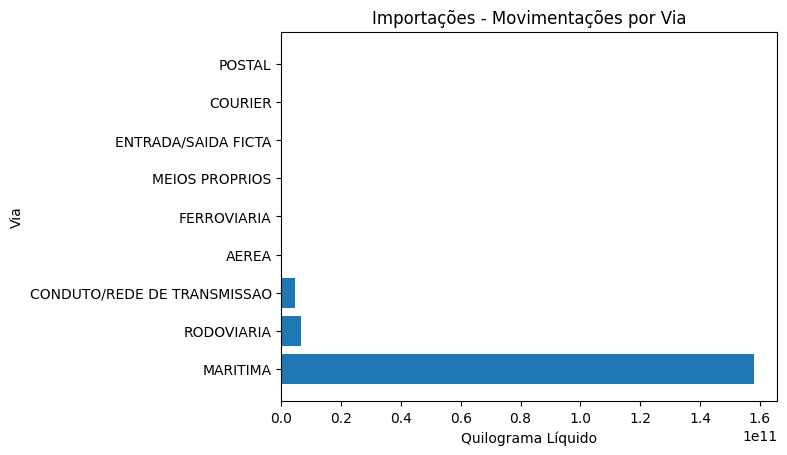

In [108]:
plt.barh(data_0['Via'], data_0['Quilograma Líquido'])
plt.title('Importações - Movimentações por Via')
plt.xlabel('Quilograma Líquido')
plt.ylabel('Via')
plt.show()

In [95]:
data_1

,Ano,Via,Tipo,Quilograma Líquido
0,2023,MARITIMA,EXP,784009868194
1,2023,RODOVIARIA,EXP,7712988003
2,2023,FLUVIAL,EXP,6533626712
3,2023,AEREA,EXP,2161249650
4,2023,VIA NAO DECLARADA,EXP,1246608778
5,2023,FERROVIARIA,EXP,155892479
6,2023,VICINAL FRONTEIRICO,EXP,146524913
7,2023,MEIOS PROPRIOS,EXP,9215509
8,2023,EM MAOS,EXP,158379
9,2023,CONDUTO/REDE DE TRANSMISSAO,EXP,56104


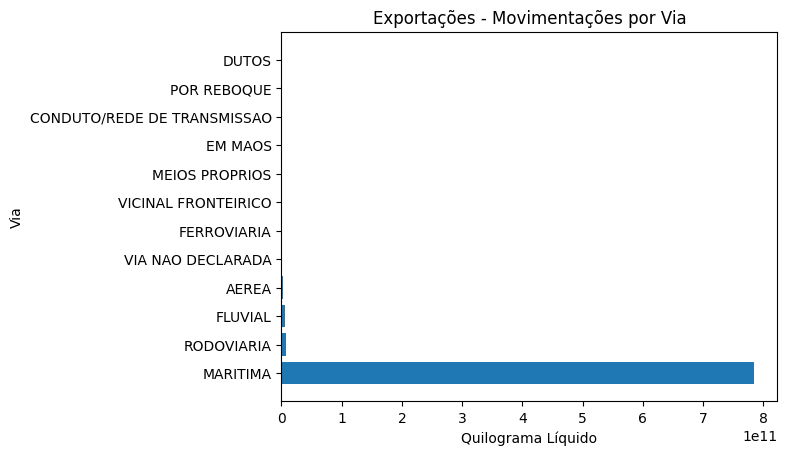

In [109]:
plt.barh(data_1['Via'], data_1['Quilograma Líquido'])
plt.title('Exportações - Movimentações por Via')
plt.xlabel('Quilograma Líquido')
plt.ylabel('Via')
plt.show()